In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
import re

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
# Define column names
columns = [
    'id', 'label', 'statement', 'subject', 'speaker', 'job_title',
    'state_info', 'party_affiliation', 'context', 'source'
]

# Load the dataset with explicit column names
df = pd.read_csv('train.tsv', sep='\t', names=columns)

# Display the first few rows
print(df.head())

                                                                                                                          id  \
2635.json  false       Says the Annies List political group supports t... abortion                              dwayne-bohac   
10540.json half-true   When did the decline of coal start? It started ... energy,history,job-accomplishments  scott-surovell   
324.json   mostly-true Hillary Clinton agrees with John McCain "by vot... foreign-policy                        barack-obama   
1123.json  false       Health care reform legislation is likely to man... health-care                           blog-posting   
9028.json  half-true   The economic turnaround started at the end of m... economy,jobs                         charlie-crist   

                                                                                                                             label  \
2635.json  false       Says the Annies List political group supports t... abortion               

In [12]:
# Check column names
print(df.columns)

# Check the distribution of labels
print(df['label'].value_counts())

# Check for missing values
print(df.isnull().sum())

Index(['id', 'label', 'statement', 'subject', 'speaker', 'job_title',
       'state_info', 'party_affiliation', 'context', 'source'],
      dtype='object')
label
President                                                            492
U.S. Senator                                                         479
Governor                                                             391
President-Elect                                                      273
U.S. senator                                                         263
                                                                    ... 
Director of the Central Intelligence Agency                            1
Chief executive officer, Christian Broadcast Network                   1
American University adjunct professor                                  1
professor of political science, Queens College                         1
President, Rhode Society for the Prevention of Cruelty to Animals      1
Name: count, Length: 1183, dtype: i

In [13]:
# Combine labels into binary categories
df['label'] = df['label'].apply(lambda x: 1 if x in ['true', 'mostly-true', 'half-true'] else 0)

# Check the distribution of labels
print(df['label'].value_counts())

label
0    10240
Name: count, dtype: int64


In [16]:
# Check for missing values in the 'statement' column
print(df['statement'].isnull().sum())

# Check the data types in the 'statement' column
print(df['statement'].apply(type).value_counts())

2210
statement
<class 'str'>      8030
<class 'float'>    2210
Name: count, dtype: int64


In [17]:
df = df.dropna(subset=['statement'])

In [18]:
df['statement'] = df['statement'].fillna('')

In [19]:
def clean_text(text):
    # Check if the input is a string
    if not isinstance(text, str):
        return ""  # Return an empty string for non-string inputs

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

In [20]:
# Apply cleaning to the dataset
df['cleaned_text'] = df['statement'].apply(clean_text)

# Check the cleaned text
print(df['cleaned_text'].head())

2635.json   false        Says the Annies List political group supports third-trimester abortions on demand.                                                                           abortion                                  texas
10540.json  half-true    When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.                energy,history,job-accomplishments     virginia
324.json    mostly-true  Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."                                                    foreign-policy                         illinois
9028.json   half-true    The economic turnaround started at the end of my term.                                                                                                       economy,jobs                            florida
12465.json  true         The Chicago Bears have had more starting quarterbacks i

In [21]:
# Check for missing values in the cleaned text
print(df['cleaned_text'].isnull().sum())

# Display the first few rows of the cleaned text
print(df[['statement', 'cleaned_text']].head())

0
                                                                                                              statement  \
2635.json  false       Says the Annies List political group supports t... abortion                                Texas   
10540.json half-true   When did the decline of coal start? It started ... energy,history,job-accomplishments   Virginia   
324.json   mostly-true Hillary Clinton agrees with John McCain "by vot... foreign-policy                       Illinois   
9028.json  half-true   The economic turnaround started at the end of m... economy,jobs                          Florida   
12465.json true        The Chicago Bears have had more starting quarte... education                           Wisconsin   

                                                                                                             cleaned_text  
2635.json  false       Says the Annies List political group supports t... abortion                                  texas  
10540.json 

In [22]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Transform the text data into TF-IDF features
X = tfidf.fit_transform(df['cleaned_text']).toarray()

# Target variable
y = df['label']

In [25]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Transform the text data into TF-IDF features
X = tfidf.fit_transform(df['cleaned_text']).toarray()

# Target variable
y = df['label']

In [26]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Transform the text data into TF-IDF features
X = tfidf.fit_transform(df['cleaned_text']).toarray()

# Target variable
y = df['label']

In [27]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

Accuracy: 100.00%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


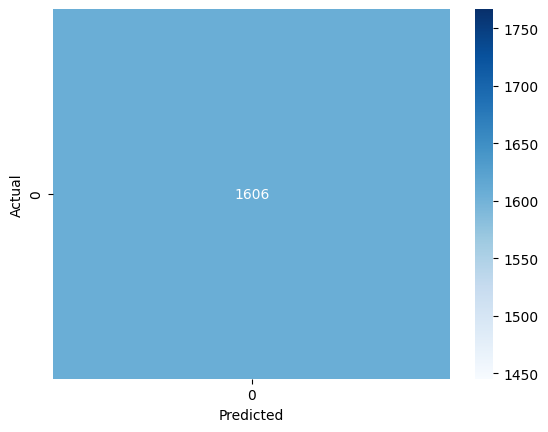

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1606

    accuracy                           1.00      1606
   macro avg       1.00      1.00      1.00      1606
weighted avg       1.00      1.00      1.00      1606



In [29]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

In [30]:
import joblib

# Save the model
joblib.dump(model, 'fake_news_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [31]:
# Load the model and vectorizer
model = joblib.load('fake_news_model.pkl')
tfidf = joblib.load('tfidf_vectorizer.pkl')

# Test on a new statemen
new_statement = "The president announced a new policy."
cleaned_text = clean_text(new_statement)
vectorized_text = tfidf.transform([cleaned_text])
prediction = model.predict(vectorized_text)
result = "True" if prediction[0] == 1 else "False"
print(f"The statement is {result}")

The statement is False
